# Understanding Data Using Python's Data Analysis Tools

In [1]:
# We will do all our imports in this cell.
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from IPython.display import display

In [2]:
# Define a few variables to represent the names of our dataset fields
FAV_LANG = "Favourite Programming Language"
FAV_OS = "Favourite OS"
GENDER = "Gender"
AGE = "Age"
HOBBIES = "Hobbies"

### 1. How do you load the CSV file into a Pandas DataFrame?

In [3]:
try:
    df = pd.read_csv("data/survey.csv")
    display(df.head())
except FileNotFoundError:
    print(
        "The file 'survey.csv' could not be found. Please ensure the file is in the correct directory."
    )

,Favourite Programming Language,Favourite OS,Age,Gender,Hobbies
0,Java,macOS,15,male,"Coding, Sports"
1,Rust,Linux,21,male,Art
2,Rust,Linux,26,female,"Sports, Traveling, Gaming, Writing, Photograph..."
3,JavaScript,Windows,29,male,"Photography, Gaming, Reading, Coding"
4,C#,Linux,25,female,"Music, Photography, Sports, Gaming, Coding, Ar..."


### 2. How do you display basic information about the DataFrame, including the number of rows, columns, and data types of each column?

In [4]:
rows, columns = df.shape
print(f"Your dataset has {rows} rows and {columns} columns.\n")
df.info()

Your dataset has 50 rows and 5 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Favourite Programming Language  50 non-null     object
 1   Favourite OS                    50 non-null     object
 2   Age                             50 non-null     int64 
 3   Gender                          50 non-null     object
 4   Hobbies                         50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


### 3. How do you get summary statistics for numerical columns in the dataset?

In [5]:
data_description = df.describe()
print(f"A summary of the dataset's numerical columns:\n{data_description}")

A summary of the dataset's numerical columns:
             Age
count  50.000000
mean   19.820000
std     4.901853
min    12.000000
25%    15.250000
50%    19.500000
75%    23.750000
max    30.000000


Before preprocessing it is advisable to create a copy of the original dataset. This is because preprocessing steps can be destructive and we may need to refer back to the original dataset. We will create a copy of the dataset and name it `dup_df`. We will then proceed to preprocess the dataset.

### Make a copy of the original dataset.

In [6]:
dup_df = df.copy()

### 4. How do you check for missing values in the dataset?

In [7]:
print("The number of missing values in the dataset is as follows:\n")
print(df.isnull().sum())

The number of missing values in the dataset is as follows:

Favourite Programming Language    0
Favourite OS                      0
Age                               0
Gender                            0
Hobbies                           0
dtype: int64


### 5. How do you fill missing values in the age column with the mean age?

In [8]:
mean_age = df[AGE].mean()
df.fillna({AGE: mean_age}, inplace=True)
print("The number of missing values in the dataset after filling with the mean:\n")
print(df.isnull().sum())

The number of missing values in the dataset after filling with the mean:

Favourite Programming Language    0
Favourite OS                      0
Age                               0
Gender                            0
Hobbies                           0
dtype: int64


### 6. How do you drop rows with any missing values?

In [9]:
dup_df.dropna(inplace=True)
display(dup_df.head())


,Favourite Programming Language,Favourite OS,Age,Gender,Hobbies
0,Java,macOS,15,male,"Coding, Sports"
1,Rust,Linux,21,male,Art
2,Rust,Linux,26,female,"Sports, Traveling, Gaming, Writing, Photograph..."
3,JavaScript,Windows,29,male,"Photography, Gaming, Reading, Coding"
4,C#,Linux,25,female,"Music, Photography, Sports, Gaming, Coding, Ar..."


### 7. How do you convert the 'age' column to an integer type?

In [10]:
dup_df[AGE] = dup_df[AGE].astype(int)

### 8. How do you find the unique values in the 'favourite programming language' column?

In [11]:
unique_values = dup_df[FAV_LANG].unique()
print(unique_values)

['Java' 'Rust' 'JavaScript' 'C#' 'Go' 'Kotlin' 'Swift' 'Python']


### 9. How do you count the number of occurences of each unique value in the 'gender' column?

In [12]:
dup_df[GENDER].value_counts()
# dup_df.groupby(GENDER).size()

Gender
female    26
male      24
Name: count, dtype: int64

### 10. How do you filter the Dataframe to show only rows where the favourite programming language is Python?

In [13]:
python_fans = dup_df[dup_df[FAV_LANG]=="Python"]
python_fans

,Favourite Programming Language,Favourite OS,Age,Gender,Hobbies
32,Python,Solaris,19,male,"Writing, Sports, Art, Hiking, Music, Gaming, P..."
34,Python,Solaris,24,male,"Gaming, Music, Reading, Writing, Art, Coding, ..."
39,Python,macOS,16,female,"Coding, Reading, Writing"


### 10a. Another method

In [14]:
python_users = dup_df.query('`Favourite Programming Language` == "Python"')
python_users

,Favourite Programming Language,Favourite OS,Age,Gender,Hobbies
32,Python,Solaris,19,male,"Writing, Sports, Art, Hiking, Music, Gaming, P..."
34,Python,Solaris,24,male,"Gaming, Music, Reading, Writing, Art, Coding, ..."
39,Python,macOS,16,female,"Coding, Reading, Writing"


### 11. How do you group data by 'favourite operating system' and calculate the average age for each group?

In [15]:
os_groups = dup_df.groupby(FAV_OS)
os_groups[AGE].mean()

Favourite OS
BSD        19.500000
Linux      19.818182
Solaris    20.090909
Windows    20.777778
macOS      18.888889
Name: Age, dtype: float64

### 12. How do you aggregrate the data to find the count of each 'favorite programming language' grouped by 'gender'?

In [16]:
dup_df.groupby(GENDER)[FAV_LANG].value_counts()

Gender  Favourite Programming Language
female  Kotlin                            5
        Swift                             5
        JavaScript                        4
        C#                                3
        Java                              3
        Rust                              3
        Go                                2
        Python                            1
male    Swift                             5
        Java                              4
        Kotlin                            4
        Go                                3
        Rust                              3
        JavaScript                        2
        Python                            2
        C#                                1
Name: count, dtype: int64

### 13. How do you create a bar chart to show the number of people who chose each favourite programming language?

<Axes: xlabel='Favourite Programming Language'>

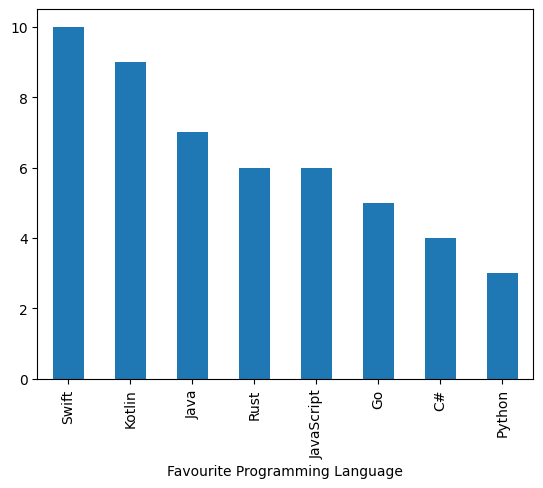

In [17]:
dup_df[FAV_LANG].value_counts().plot(kind="bar")

### 14. How do you create a pie chart to show the distribution of the favourite operating systems? 

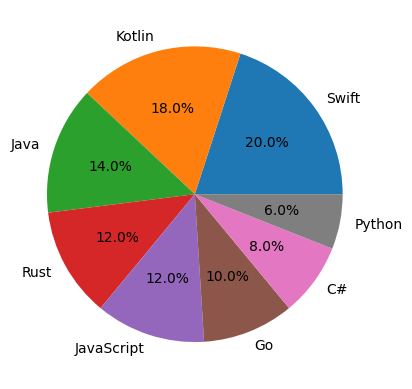

In [18]:
pie_y_labels = dup_df[FAV_LANG].value_counts()
pie_x_labels = pie_y_labels.index
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
plt.pie(pie_y_labels, labels=pie_x_labels, autopct="%1.1f%%", colors=colors);

### 15. How do you create a histogram to visualize the distribution of the ages?

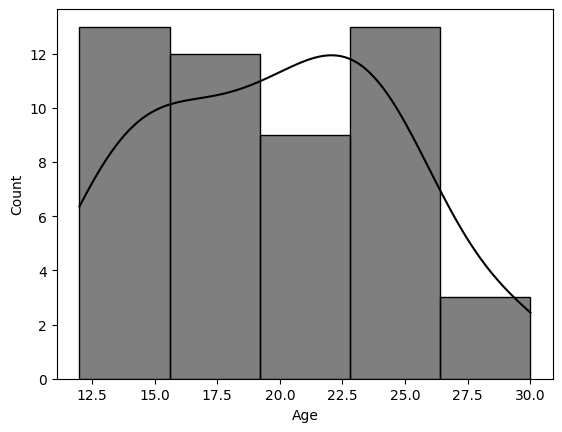

In [19]:
sns.histplot(data=dup_df, x=AGE, bins=5, kde=True, color="black");

### 16. How do you create a scatter plot to show the relationship between age and favourite programming language?

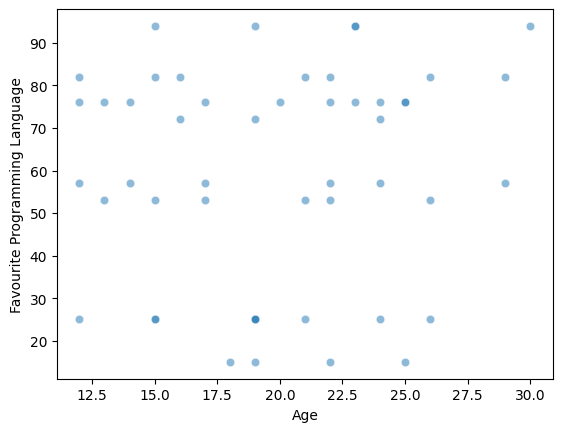

In [20]:
numerical_value_for_favorite_language = df[FAV_LANG].apply(
    lambda x: hash(x) % 100
)
sns.scatterplot(data=df, x=AGE, y=numerical_value_for_favorite_language, alpha=0.5);

### 17. How do you create a boxplot to compare the ages across different programming languages?

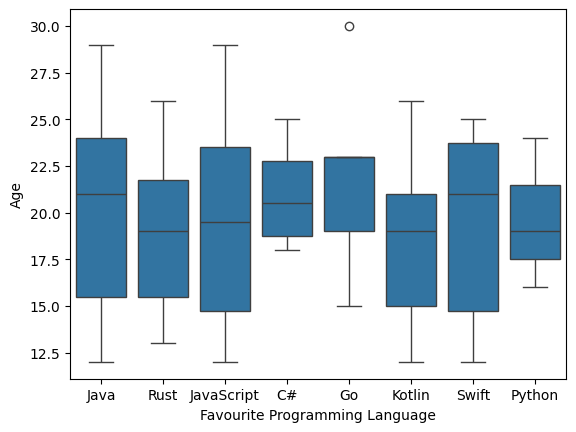

In [21]:
sns.boxplot(data=df, x=FAV_LANG, y=AGE);

### 18. How do you create a stacked bar chart to show the number of people for each combination of favourite programming language and gender?

<Axes: xlabel='Gender'>

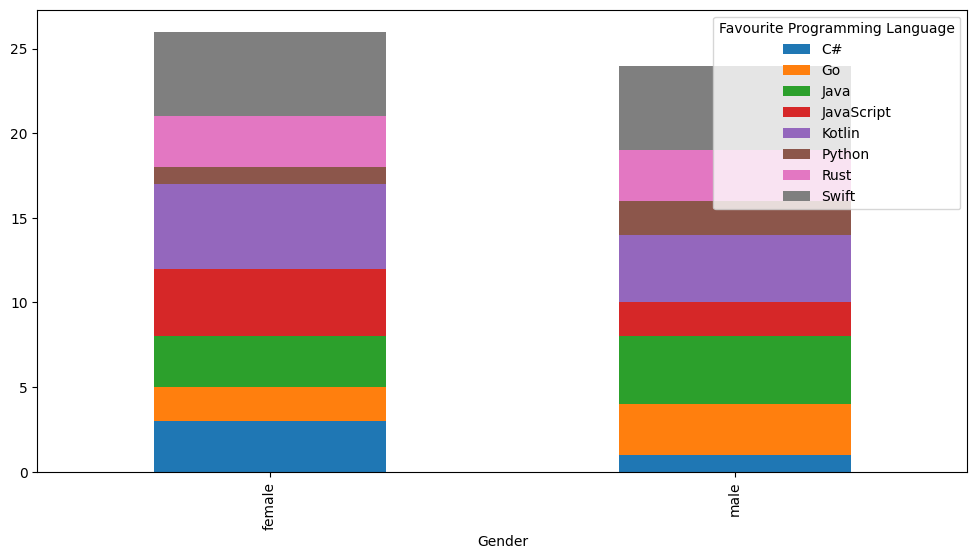

In [22]:
gender_language_groups = dup_df.groupby([GENDER, FAV_LANG]).size().unstack()
gender_language_groups.plot(kind="bar", stacked=True, figsize=(12, 6))

### 19. How do you create a figure with subplots for the distributions of age, favourite programming language, and favourite operating system?

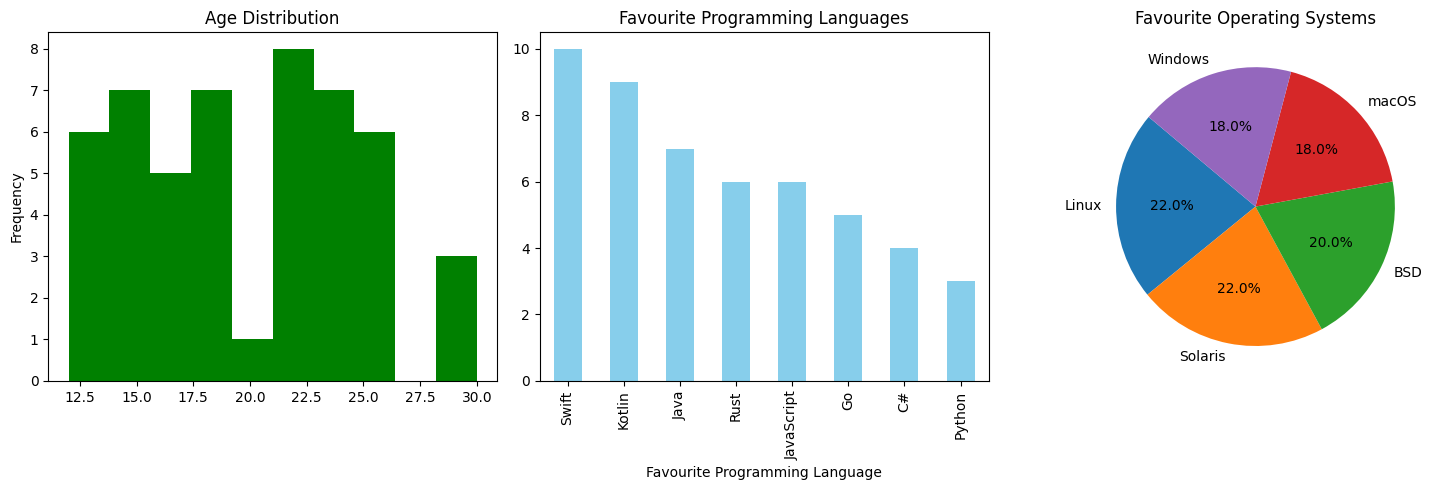

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

df[AGE].plot(kind='hist', bins=10, ax=axs[0], color='green')
axs[0].set_title('Age Distribution')

df[FAV_LANG].value_counts().plot(kind='bar', ax=axs[1], color='skyblue')
axs[1].set_title('Favourite Programming Languages')

df[FAV_OS].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[2], startangle=140)
axs[2].set_title('Favourite Operating Systems')
axs[2].set_ylabel('')

plt.tight_layout()
plt.show()

### 20. How do you create an interactive bar chart to show the count of each favourite programming language using Plotly?

In [24]:
fig = px.bar(df, x=FAV_LANG, title='Favourite Programming Languages')
fig.show()